In [1]:
import torch
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
durations_file_glow = h5py.File("/work/asr3/rossenbach/rilling/sisyphus_work_dirs/glow_tts_asr_v2/i6_core/returnn/forward/ReturnnForwardJob.VOx2xHbcy1RG/output/output.hdf", "r")
durations_file_ctc = h5py.File("/work/asr4/rossenbach/sisyphus_work_folders/tts_asr_2021_work/i6_experiments/users/rossenbach/tts/duration_extraction/ViterbiAlignmentToDurationsJob.AyAO6JWXTnVc/output/durations.hdf", "r")
durations_file_gmm = h5py.File("/work/asr3/rossenbach/rilling/sisyphus_work_dirs/glow_tts_asr_v2/i6_experiments/users/hilmes/tools/tts/extract_alignment/ExtractDurationsFromRASRAlignmentJob.bJGtOyYE693j/output/durations.hdf", "r")

In [10]:
durations_file_glow["seqTags"].shape, durations_file_ctc["seqTags"].shape, durations_file_gmm["seqTags"].shape

((27535,), (28539,), (27535,))

In [11]:
durations_file_glow["seqTags"][0], durations_file_gmm["seqTags"][0], 

(b'train-clean-100/7302-86815-0017/7302-86815-0017',
 b'train-clean-100/103-1240-0000/103-1240-0000')

In [4]:
assert durations_file_ctc.keys() == durations_file_glow.keys()
assert durations_file_gmm.keys() == durations_file_glow.keys()
durations_file_ctc.keys()

<KeysViewHDF5 ['inputs', 'labels', 'seqLengths', 'seqTags']>

In [18]:
durations_ctc = durations_file_ctc["inputs"]
seq_lengths_ctc = durations_file_ctc["seqLengths"][:,0]
seq_tags_ctc = list(durations_file_ctc["seqTags"])

durations_glow = durations_file_glow["inputs"]
seq_lengths_glow = np.array(durations_file_glow["seqLengths"])[:,0]
seq_tags_glow = list(durations_file_glow["seqTags"])

durations_gmm = durations_file_gmm["inputs"]
seq_lengths_gmm = durations_file_gmm["seqLengths"][:,0]
seq_tags_gmm = list(durations_file_gmm["seqTags"])

In [19]:
def get_durations_for_index(durations, lengths, index):
    start = 0
    end = 0
    for i in range(index+1):
        start = end
        end += lengths[i]
    return durations[start:end]


In [15]:
def get_durations_for_tag(durations, lengths, tags, tag):
    return get_durations_for_index(durations, lengths, tags.index(tag))

In [16]:
def glow_get_durations_for_tag(tag):
    return get_durations_for_tag(durations_glow, seq_lengths_glow, seq_tags_glow, tag)
def glow_get_durations_for_index(index):
    return get_durations_for_index(durations_glow, seq_lengths_glow, index)
def ctc_get_durations_for_tag(tag):
    return get_durations_for_tag(durations_ctc, seq_lengths_ctc, seq_tags_ctc, tag).squeeze()
def ctc_get_durations_for_index(index):
    return get_durations_for_index(durations_ctc, seq_lengths_ctc, index).squeeze()


b'train-clean-100/1723-141149-0097/1723-141149-0097'

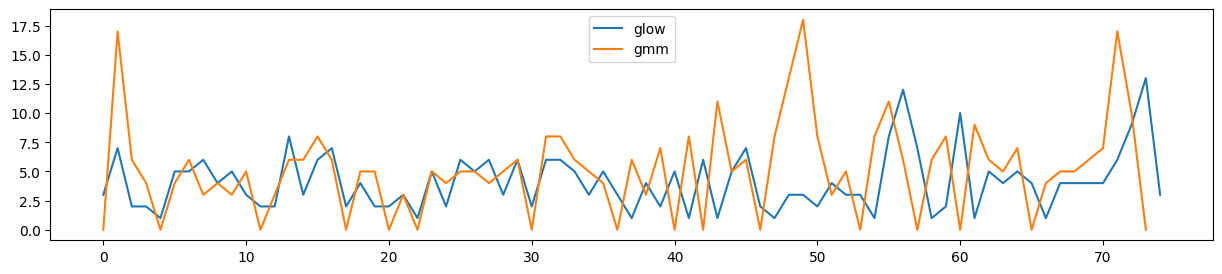

In [47]:
# index_ctc = range(0, 20)
# index_glow = seq_tags_glow.index(seq_tags_ctc[index_ctc])

# assert seq_tags_ctc[index_ctc] == seq_tags_glow[index_glow]
# duration_ctc = np.array([])
# duration_glow = np.array([])
# for i in range(0,20):
index_glow = 10
index_gmm = seq_tags_gmm.index(seq_tags_glow[index_glow])
index_ctc = seq_tags_ctc.index(seq_tags_glow[index_glow])

duration_glow = get_durations_for_index(durations_glow, seq_lengths_glow, index_glow)
duration_gmm = get_durations_for_index(durations_gmm, seq_lengths_gmm, index_gmm)
duration_ctc = get_durations_for_index(durations_ctc, seq_lengths_ctc, index_ctc)

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(duration_glow, label="glow")
# ax.plot(duration_ctc, label="ctc")
ax.plot(duration_gmm, label="gmm")
plt.legend()

np.sum(np.abs(duration_ctc - duration_glow))

seq_tags_glow[index_glow]


In [ ]:
len(seq_lengths_ctc), len(seq_lengths_glow)

(28539, 27535)